In [4]:
import os, sys, json
src_path = os.path.abspath(os.path.join(".."))
if src_path not in sys.path:
    sys.path.append(src_path)

import torch
from torch import nn
from torch.autograd import Variable
import yaml
from yaml import CLoader as Loader

import numpy as np

from PIL import Image
from matplotlib import pyplot as plt

from src.config import CaptionConfig

%load_ext autoreload
%autoreload 2

%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
config_file = os.path.join(src_path, "src", "config.yml")
caption_conf = CaptionConfig(config_file)

loading annotations into memory...
Done (t=0.48s)
creating index...
index created!
loaded - val captions








In [6]:
coco_cap = caption_conf.get_coco_captions()
annIds = coco_cap.getAnnIds()
print(coco_cap.loadAnns(annIds[0]))


[{'image_id': 203564, 'id': 37, 'caption': 'A bicycle replica with a clock as the front wheel.'}]


In [10]:
coco_cap.loadAnns(annIds[0])
imgIds = coco_cap.getImgIds()
print(coco_cap.loadImgs(imgIds[:1]))
print()

print(caption_conf.get_image_path(imgIds[:1]))


[{'license': 3, 'file_name': 'COCO_val2014_000000391895.jpg', 'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000391895.jpg', 'height': 360, 'width': 640, 'date_captured': '2013-11-14 11:18:45', 'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg', 'id': 391895}]

['/Users/nsimsiri/Documents/code/ml/coco/val2014/COCO_val2014_000000391895.jpg']


{'image_id': 179765, 'id': 38, 'caption': 'A black Honda motorcycle parked in front of a garage.'}
179765


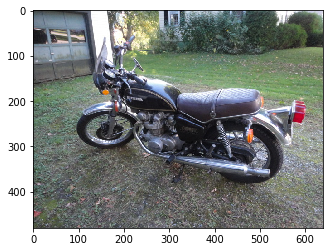

In [20]:
def loadImg(imgId):
    print(imgId)
    image_i_path = caption_conf.get_image_path(imgId)[0]
    assert(os.path.exists(image_i_path))
    return Image.open(image_i_path)

ann_i = coco_cap.loadAnns(annIds[1])[0]
print(ann_i)
img = loadImg(ann_i['image_id'])

img_arr = np.array(img)

plt.imshow(img_arr)

In [ ]:
print(os.path.join('/a','b','c'))

In [23]:
from sklearn.model_selection import train_test_split

a = train_test_split(list(range(10)), train_size=0.7, test_size=0.3)
print(a)

[[7, 0, 8, 2, 9, 5, 6], [1, 4, 3]]
